In [1]:
!pip install tensorflow


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [8]:
data = pd.read_csv(r"C:\Users\harsh\Desktop\Internship Projects\airbnb-stock-price\Airbnb.csv")
data.head()

,Date,Adj.Close,Volume,Open,High,Low
0,06/03/22,119.83,4584611.0,118.07,121.50,117.56
1,06/02/22,121.26,5177244.0,117.13,123.00,116.27
2,06/01/22,116.72,6879606.0,121.05,121.07,114.40
3,05/31/22,120.87,9117555.0,120.50,122.30,117.16
4,05/27/22,120.50,7391500.0,116.00,120.70,115.77


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       373 non-null    object 
 1   Adj.Close  373 non-null    float64
 2   Volume     373 non-null    float64
 3   Open       373 non-null    float64
 4   High       373 non-null    float64
 5   Low        373 non-null    float64
dtypes: float64(5), object(1)
memory usage: 17.6+ KB


In [12]:
print(data.columns)

Index(['Date', 'Adj.Close', 'Volume', 'Open', 'High', 'Low'], dtype='object')


In [15]:
closing_price = data['Adj.Close'].values.reshape(-1, 1)

In [16]:
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(closing_price)

In [17]:
train_size = int(len(normalized_data) * 0.8)
test_size = len(normalized_data) - train_size
train_data, test_data = normalized_data[0:train_size], normalized_data[train_size:len(normalized_data)]

In [18]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)


In [19]:
sequence_length = 60

In [20]:
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [21]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

1/1 [==============================] - 0s 47ms/step


In [25]:
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

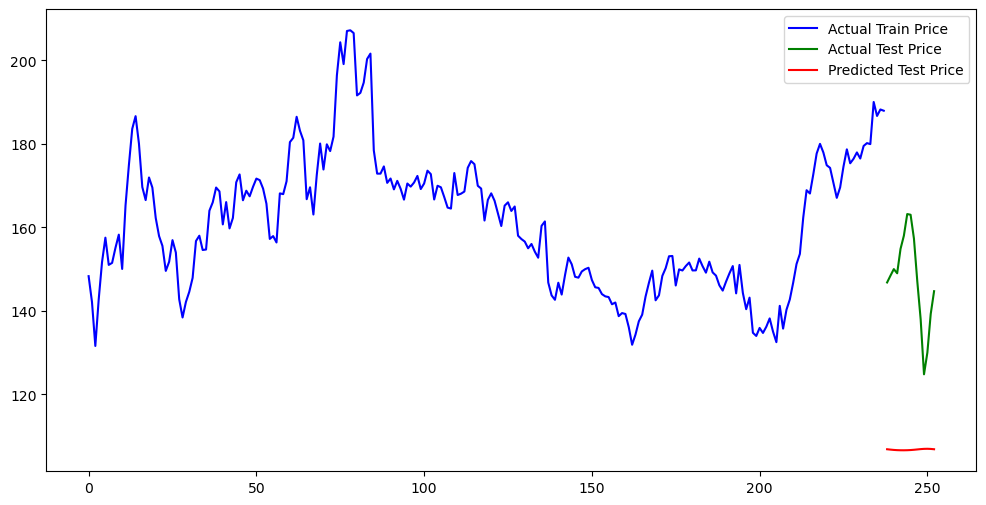

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_train)), y_train, label='Actual Train Price', color='blue')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual Test Price', color='green')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), test_predictions, label='Predicted Test Price', color='red')
plt.legend(loc='best')
plt.show()
